In [1]:
import timeit
import random
from statistics import mean
from typing import Callable
from operator import mul
from functools import reduce
import decimal
import math

import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

I. Generate an n-dimensional random vector 𝒗 = [𝑣%, 𝑣', ... , 𝑣)] with non-negative elements. For 𝒗, implement the following calculations and algorithms:

In [2]:
N_RANGE = np.array(range(1, 2001))

In [3]:
def complexity_analysis(measured_function: Callable, data_generate_function: Callable, n_range, measurements_max=5):
    mean_execution_time = []
    for i in tqdm(n_range):
        execution_time = []
        for j in range(0, measurements_max):
            data = data_generate_function(i)
            start = timeit.default_timer()
            measured_function(data)
            end = timeit.default_timer()
            execution_time.append(end - start)
        mean_execution_time.append(mean(execution_time))
    return mean_execution_time


In [4]:
def generate_array(n):
    return np.random.rand((n))

In [5]:
def constant_function(data):
    return 1

In [6]:
def product_function(data):
    return reduce(mul, data, 0)

In [7]:
decimal.getcontext().prec = 100


def direct_calculation_polynomial(coefficients, x=1.5):
    s = decimal.Decimal(0)
    for i, v in enumerate(coefficients):
        s += decimal.Decimal(v) * (decimal.Decimal(x) ** i)
    return s

In [8]:
def horner_calculation_polynomial(coefficients, x=1.5):
    p = coefficients[-1]
    i = len(coefficients) - 2
    while i >= 0:
        p = p * x + coefficients[i]
        i -= 1
    return p

In [9]:
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr) - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

In [10]:
def quick_sort(array):
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return quick_sort(less) + equal + quick_sort(greater)
    else:
        return array

In [11]:
def generate_two_matrix(n):
    return np.random.rand(n, n), np.random.rand(n, n)

In [12]:
def matrix_product(data):
    a, b = data
    zip_b = list(zip(*b))
    return [[sum(ele_a * ele_b for ele_a, ele_b in zip(row_a, col_b))
             for col_b in zip_b] for row_a in a]

In [13]:
from scipy.optimize import curve_fit

In [14]:
def O_1_function(data, k):
    return [k for _ in data]

In [15]:
def O_n_function(data, k):
    return [k * i for i in range(1, len(data) + 1)]

In [16]:
def O_n_2_function(data, k):
    return [k * i ** 2 for i in range(1, len(data) + 1)]

In [17]:
def O_n_log_n_function(data, k):
    return [k * i * math.log(i) for i in range(1, len(data) + 1)]

In [18]:
def O_n_3_function(data, k):
    return [k * i ** 3 for i in range(1, len(data) + 1)]

100%|██████████| 2000/2000 [00:00<00:00, 17289.97it/s]


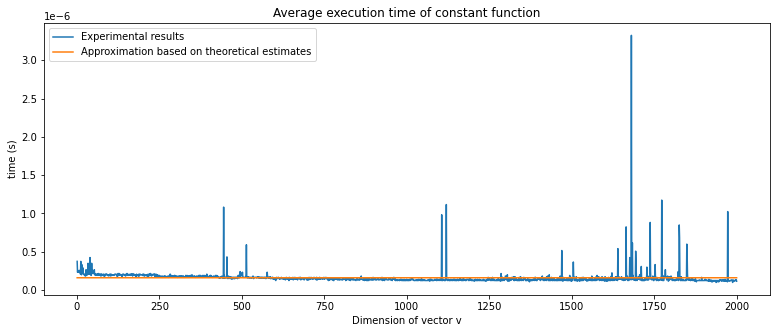

In [218]:
execution_function_time = complexity_analysis(constant_function, generate_array, N_RANGE)

popt, _ = curve_fit(O_1_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_1_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of constant function')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 2192.60it/s]


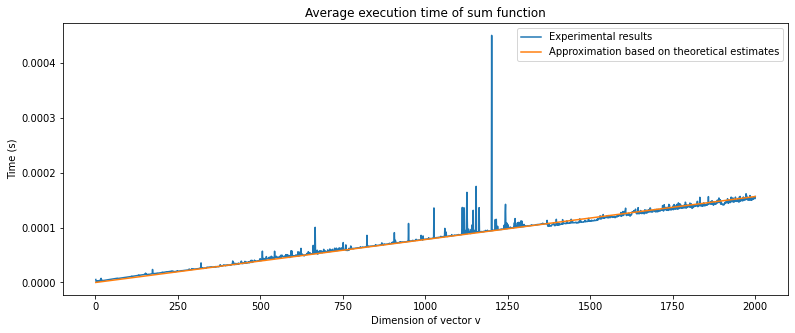

In [221]:
execution_function_time = complexity_analysis(sum, generate_array, N_RANGE)

popt, _ = curve_fit(O_n_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_n_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of sum function')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

100%|██████████| 2000/2000 [00:01<00:00, 1729.01it/s]


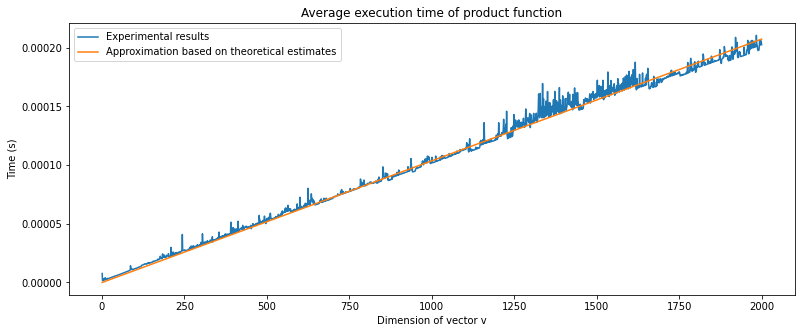

In [222]:
execution_function_time = complexity_analysis(product_function, generate_array, N_RANGE)

popt, _ = curve_fit(O_n_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_n_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of product function')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

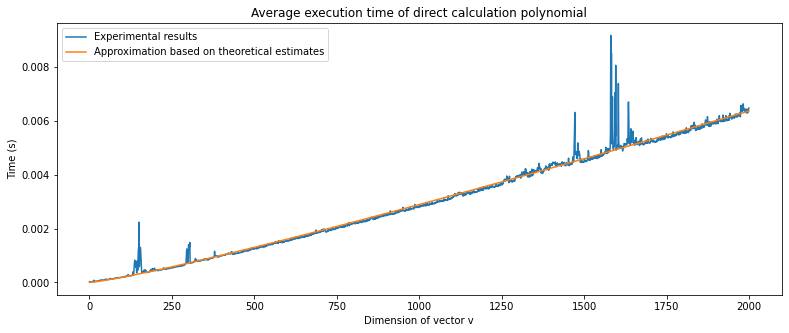

In [252]:
execution_function_time = complexity_analysis(direct_calculation_polynomial, generate_array, N_RANGE)

popt, _ = curve_fit(O_n_log_n_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_n_log_n_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of direct calculation polynomial')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

 86%|████████▌ | 1714/2000 [00:01<00:00, 555.79it/s] /var/folders/39/sbhbfb514339n_2mzhldqjm40000gn/T/ipykernel_9868/274866967.py:5: RuntimeWarning: overflow encountered in double_scalars
  p = p * x + coefficients[i]
100%|██████████| 2000/2000 [00:02<00:00, 751.52it/s]


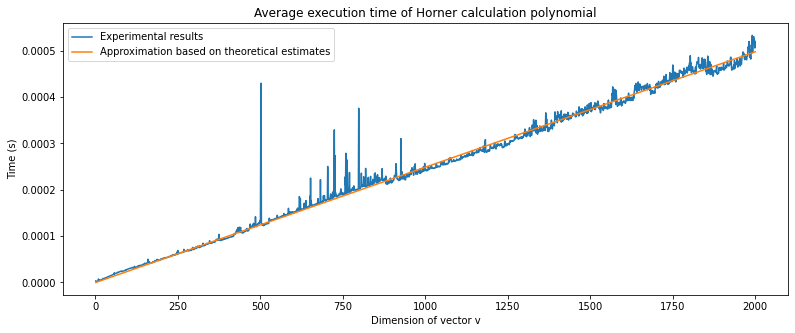

In [224]:
execution_function_time = complexity_analysis(horner_calculation_polynomial, generate_array, N_RANGE)

popt, _ = curve_fit(O_n_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_n_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of Horner calculation polynomial')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

100%|██████████| 2000/2000 [11:29<00:00,  2.90it/s] 


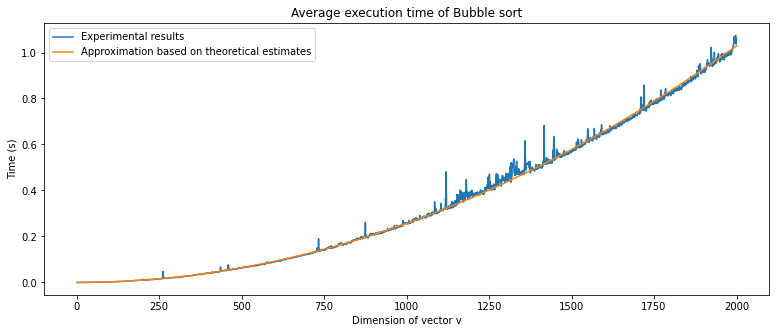

In [229]:
execution_function_time = complexity_analysis(bubble_sort, generate_array, N_RANGE, 1)
popt, _ = curve_fit(O_n_2_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_n_2_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of Bubble sort')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

100%|██████████| 2000/2000 [00:16<00:00, 117.93it/s]


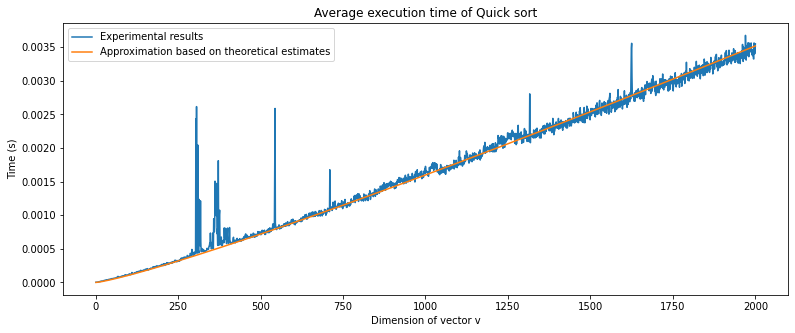

In [253]:
execution_function_time = complexity_analysis(quick_sort, generate_array, N_RANGE, 5)
popt, _ = curve_fit(O_n_log_n_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_n_log_n_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of Quick sort')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

100%|██████████| 2000/2000 [00:03<00:00, 627.74it/s]


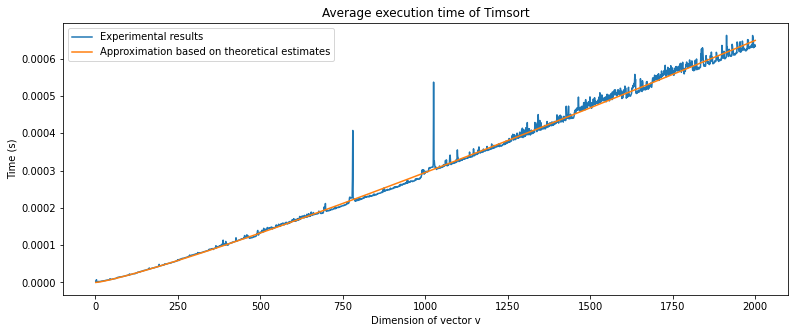

In [254]:
execution_function_time = complexity_analysis(sorted, generate_array, N_RANGE)

popt, _ = curve_fit(O_n_log_n_function, N_RANGE, execution_function_time)
theoretical_execution_time = O_n_log_n_function(N_RANGE, *popt)

plt.figure(figsize=(13, 5))
plt.plot(N_RANGE, execution_function_time, label="Experimental results")
plt.plot(N_RANGE, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of Timsort')
plt.xlabel('Dimension of vector v')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

100%|██████████| 250/250 [14:43<00:00,  3.54s/it]


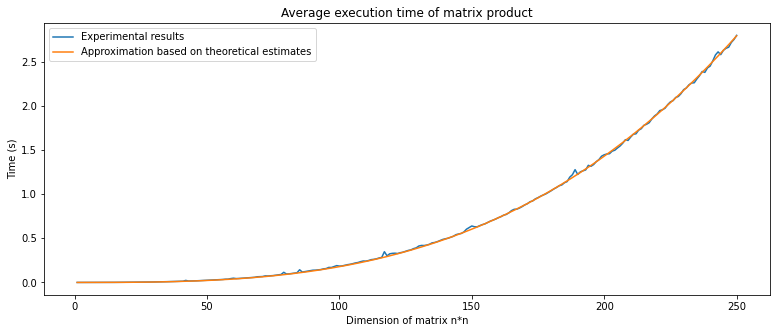

In [20]:
matrix_n_range = range(1, 251)

execution_function_time = complexity_analysis(matrix_product, generate_two_matrix, matrix_n_range)

popt, _ = curve_fit(O_n_3_function, matrix_n_range, execution_function_time)
theoretical_execution_time = O_n_3_function(matrix_n_range, *popt)

plt.figure(figsize=(13, 5))
plt.plot(matrix_n_range, execution_function_time, label="Experimental results")
plt.plot(matrix_n_range, theoretical_execution_time, label="Approximation based on theoretical estimates")
plt.title('Average execution time of matrix product')
plt.xlabel('Dimension of matrix n*n')
plt.ylabel('Time (s)')
plt.legend()
plt.show()